In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [40]:
data= pd.read_csv("C:/Users/trinity/Downloads/employee_data.csv")
data.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [41]:
data.isnull().sum()

Unnamed: 0          0
id                  0
groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

In [42]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
id,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
age,1000.0,41.155,13.462995,18.0,30.00,41.0,53.00,64.0
healthy_eating,1000.0,4.944,2.013186,0.0,4.00,5.0,6.00,10.0
active_lifestyle,1000.0,5.683,2.048587,0.0,4.00,6.0,7.00,10.0
salary,1000.0,2227.461,1080.209760,553.0,1360.00,2174.0,2993.75,5550.0


In [57]:
data=data.drop(columns=["Unnamed: 0","id","groups"])

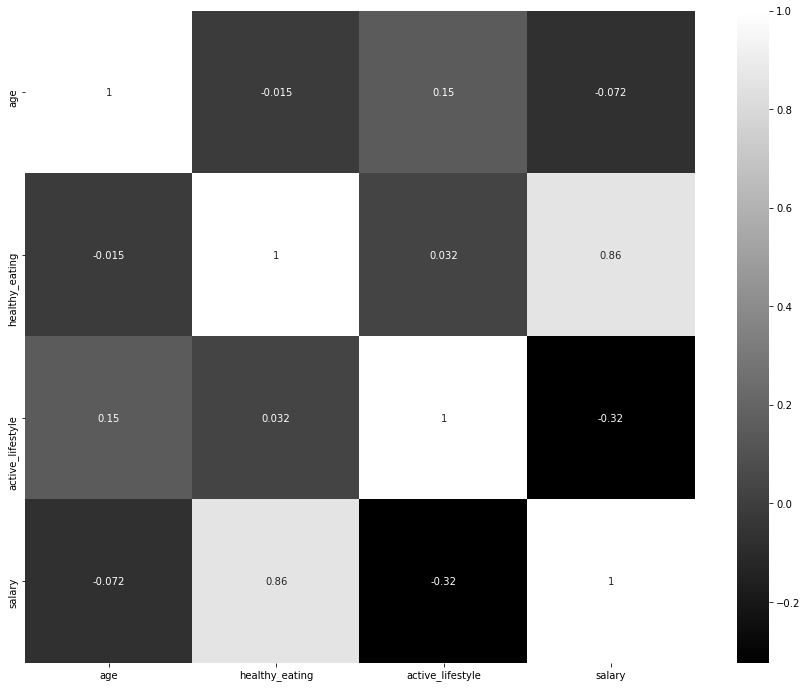

In [58]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.heatmap(data.corr(), cmap='gray', annot=True)
plt.show()

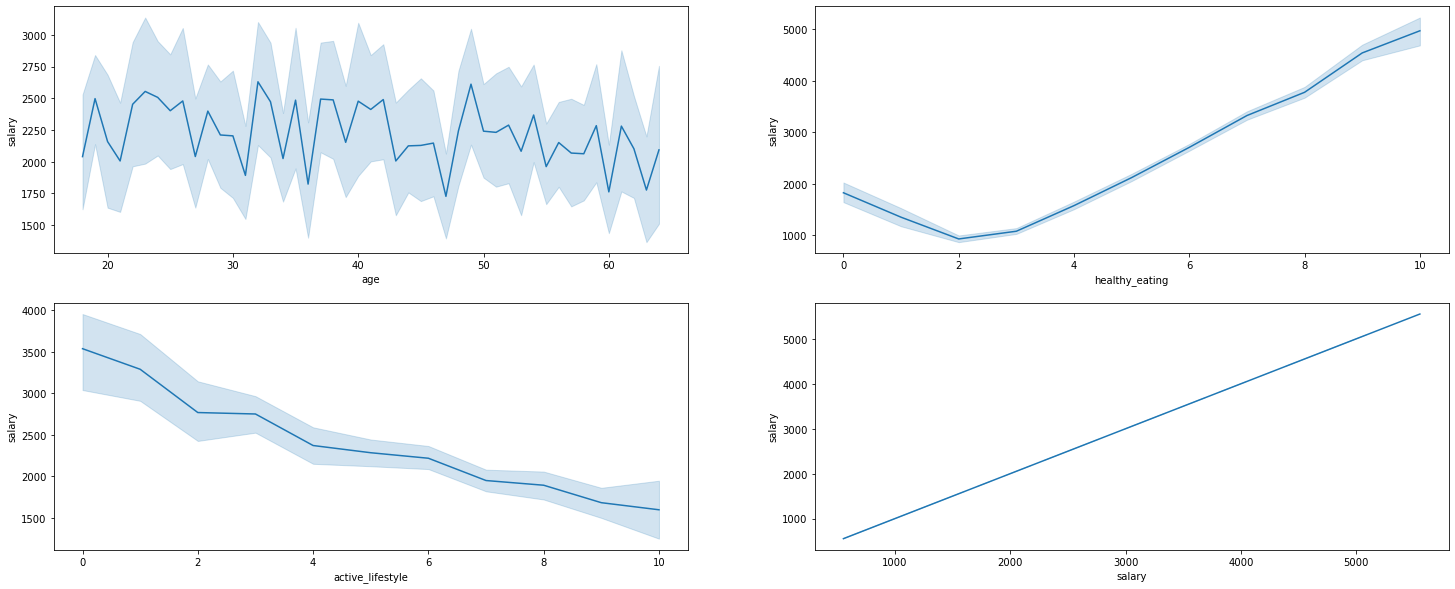

In [60]:
plt.figure(figsize=(25,10))
for i,col in enumerate(data[:], start=1):
    plt.subplot(2,2,i)
    sns.lineplot(x=data[col], y="salary", data=data) 
plt.show()

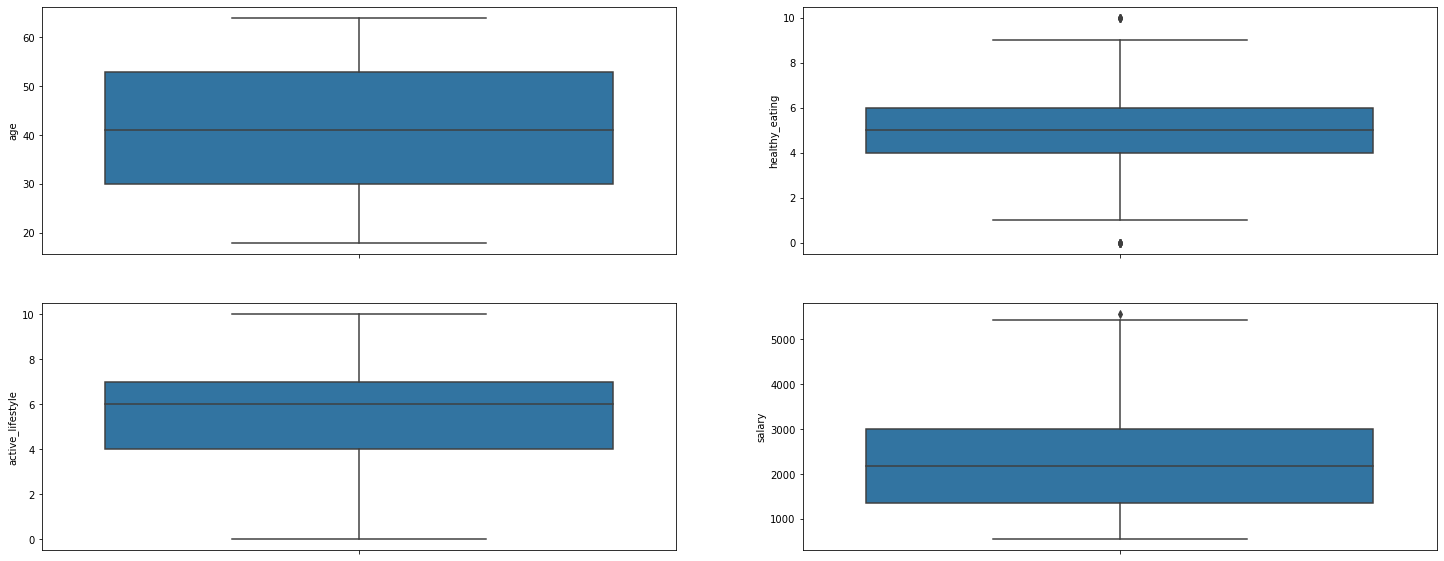

In [62]:
plt.figure(figsize=(25,10))
for i,col in enumerate(data[:], start=1):
    plt.subplot(2,2,i)
    sns.boxplot(y=col, data=data)
plt.show() 

In [66]:
X = data.drop(columns=['salary'])
Y = data['salary']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#make the x for train and test (also called validation data) 
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8,random_state=4)


In [79]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(xtrain, ytrain)


accuracy = reg.score(xtest, ytest)*100
print("Accuracy: {}".format(accuracy))
y_predict = reg.predict(xtest)

Accuracy: 85.67655899280022


<AxesSubplot:xlabel='salary', ylabel='Density'>

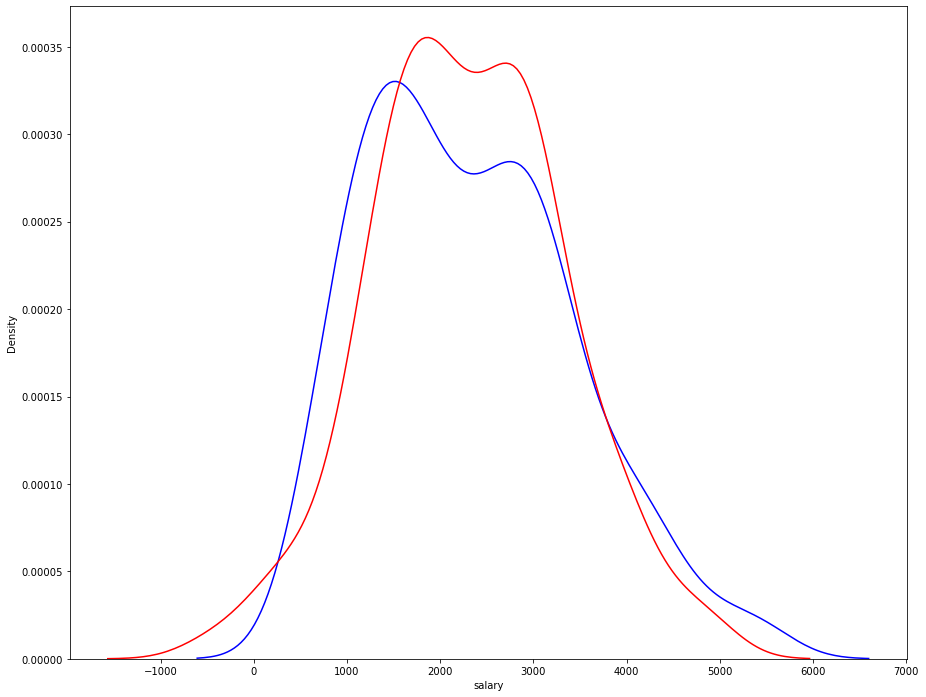

In [81]:
import numpy as np
import matplotlib.pyplot as plt

hist1 = ytest
hist2 = y_predict

from scipy.stats import norm

sns.distplot(hist1,color="b",hist=False, label='True Value')
sns.distplot(hist2,hist=False,color='red', label='Predicted Value')